**<font size="6">Script para encontrar mayor y menor segmentación del LV</font>**

<dl>
<dt>Diferentes métodos a tener en cuenta:</dt>
    <dd>- píxeles en la imagen</dd>
    <dd>- aproximación de un círculo a la región</dd>
</dl>

In [2]:
# Program: <MAX_MIN_LV.ipynb>
# Author: Marc Bracons Cucó
# Affiliation: Department of Telecommunication and Systems Engineering, Autonomous University of Barcelona, Wireless Information Networking Group
# Copyright © 2023 Marc Bracons Cucó
# 
# This program is proprietary software; you may not use, distribute, or modify it 
# without the explicit permission of the author.
#
# If you wish to use this program in your work, please, contact the author.

In [131]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks
import os
import cv2
from skimage.measure import find_contours

**<font size="4">Imagen de prueba**</font>

Formato de la imagen: PNG
Tamaño de la imagen: (256, 256)
Modo de la imagen: RGBA


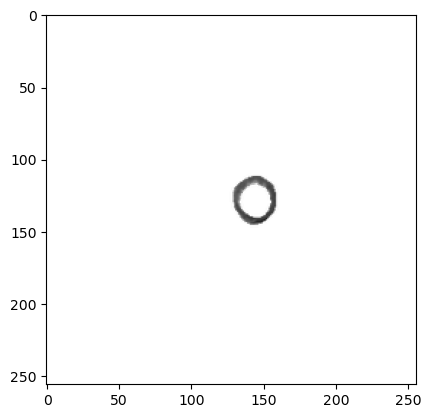

In [67]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la imagen de pruebas
ruta_imagen = "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_2/only_cine_eje_corto_2frame_1/recortes/recorte_390.png"

# Cargar la imagen
imagen = Image.open(ruta_imagen)

# Mostrar información sobre la imagen
print("Formato de la imagen:", imagen.format)
print("Tamaño de la imagen:", imagen.size)
print("Modo de la imagen:", imagen.mode)

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('on')
plt.show()

**<font size="4">Píxeles en la imagen**</font>

In [68]:
from PIL import Image
import matplotlib.pyplot as plt

# Convertir la imagen a modo binario (blanco y negro)
imagen_binaria = imagen.convert("1")

# Obtener la matriz de píxeles de la imagen binaria
pixels = imagen_binaria.load()

# Contar los píxeles blancos dentro de la región
contador = 0
for y in range(imagen_binaria.size[1]):
    for x in range(imagen_binaria.size[0]):
        if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
            contador += 1

# Imprimir el resultado
print("Cantidad de píxeles dentro de la región:", contador)

Cantidad de píxeles dentro de la región: 213


**<font size="4">Aproximación de un círculo a la región**</font>

Usando la transformada de Hough circular

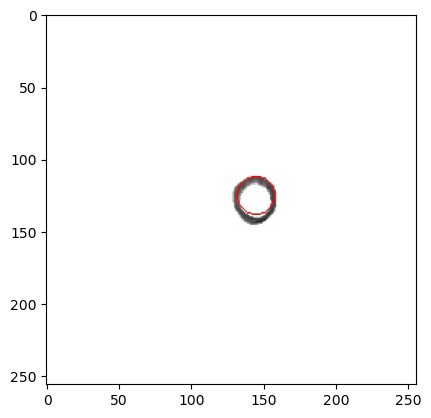

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Convertir la imagen a modo binario (blanco y negro)
imagen_binaria = imagen.convert("1")

# Convertir la imagen binaria a una matriz NumPy
imagen_array = np.array(imagen_binaria)

# Configurar los parámetros de la transformada de Hough circular
radio_min = 10  # Radio mínimo del círculo a buscar
radio_max = 200  # Radio máximo del círculo a buscar

# Aplicar la transformada de Hough circular
hough_radii = np.arange(radio_min, radio_max + 1)
hough_result = hough_circle(imagen_array, hough_radii)

# Encontrar los parámetros del círculo más prominente
accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)

# Obtener los parámetros del círculo encontrado
centro_x = cx[0]
centro_y = cy[0]
radio = radii[0]

# Dibujar el círculo en la imagen original
dibujo = imagen.copy()
draw = ImageDraw.Draw(dibujo)
draw.ellipse((centro_x - radio, centro_y - radio, centro_x + radio, centro_y + radio), outline="red")

# Mostrar el dibujo en el output de Anaconda
plt.imshow(dibujo)
plt.axis('on')
plt.show()

**<font size="4">Contador de píxeles en carpeta**</font>

Muestra la imágen con más y menos píxeles de una carpeta

In [121]:
# Ruta de la carpeta que contiene las imágenes
ruta_carpeta = "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_8/only_cine_eje_corto_8frame_1/recortes/"

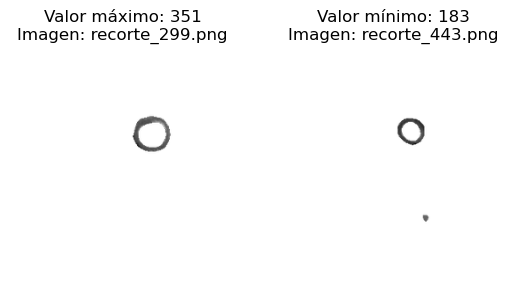

In [132]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar la imagen con valor máximo y mínimo
imagen_max = None
imagen_min = None
valor_max = -1
valor_min = float('inf')

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    
    # Cargar la imagen
    imagen = Image.open(ruta_imagen)
    
    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")
    
    # Obtener la matriz de píxeles de la imagen binaria
    pixels = imagen_binaria.load()
    
    # Contar los píxeles blancos dentro de la región
    contador = 0
    for y in range(imagen_binaria.size[1]):
        for x in range(imagen_binaria.size[0]):
            if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                contador += 1
    
    # Actualizar imagen con valor máximo si se cumple la condición de mínimo 80 píxeles
    if contador > valor_max and contador >= 80:
        valor_max = contador
        imagen_max = imagen
        nombre_max = archivo
    
    # Actualizar imagen con valor mínimo si se cumple la condición de mínimo 80 píxeles
    if contador < valor_min and contador >= 80:
        valor_min = contador
        imagen_min = imagen
        nombre_min = archivo

# Mostrar las imágenes con valor máximo y mínimo
fig, axes = plt.subplots(1, 2)
axes[0].imshow(imagen_max)
axes[0].set_title("Valor máximo: {}\nImagen: {}".format(valor_max, nombre_max))
axes[0].axis('off')
axes[1].imshow(imagen_min)
axes[1].set_title("Valor mínimo: {}\nImagen: {}".format(valor_min, nombre_min))
axes[1].axis('off')
plt.show()

**<font size="4">Aproximación de un círculo a la región en carpeta**</font>

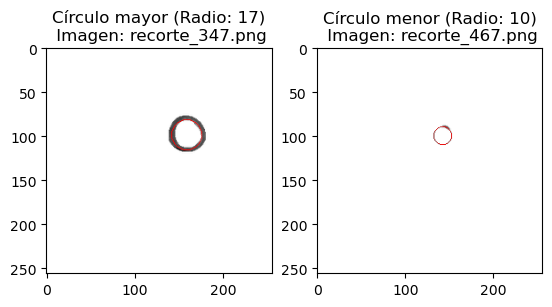

In [114]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar el círculo mayor y menor
radio_mayor = -1
radio_menor = float('inf')
imagen_mayor = None
imagen_menor = None
nombre_mayor = ""
nombre_menor = ""

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    
    # Cargar la imagen
    imagen = Image.open(ruta_imagen)
    
    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")
    
    # Convertir la imagen binaria a una matriz NumPy
    imagen_array = np.array(imagen_binaria)
    
    # Configurar los parámetros de la transformada de Hough circular
    radio_min = 10  # Radio mínimo del círculo a buscar
    radio_max = 200  # Radio máximo del círculo a buscar
    
    # Aplicar la transformada de Hough circular
    hough_radii = np.arange(radio_min, radio_max + 1)
    hough_result = hough_circle(imagen_array, hough_radii)
    
    # Encontrar los parámetros de los círculos
    accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)
    
    # Comprobar si se encontraron círculos
    if len(cx) == 0:
        # No se encontraron círculos en la imagen, omitir esta imagen
        continue
    
    # Obtener los parámetros del círculo encontrado
    centro_x = cx[0]
    centro_y = cy[0]
    radio = radii[0]
    
    # Actualizar círculo mayor
    if radio > radio_mayor:
        radio_mayor = radio
        imagen_mayor = imagen.copy()
        dibujo_mayor = imagen_mayor.copy()
        draw_mayor = ImageDraw.Draw(dibujo_mayor)
        draw_mayor.ellipse((centro_x - radio_mayor, centro_y - radio_mayor, centro_x + radio_mayor, centro_y + radio_mayor), outline="red")
        nombre_mayor = archivo
    
    # Actualizar círculo menor
    if radio < radio_menor:
        radio_menor = radio
        imagen_menor = imagen.copy()
        dibujo_menor = imagen_menor.copy()
        draw_menor = ImageDraw.Draw(dibujo_menor)
        draw_menor.ellipse((centro_x - radio_menor, centro_y - radio_menor, centro_x + radio_menor, centro_y + radio_menor), outline="red")
        nombre_menor = archivo

# Verificar si se encontraron círculos en todas las imágenes
if imagen_mayor is None or imagen_menor is None:
    print("No se encontraron círculos en algunas imágenes.")
else:
    # Mostrar los círculos mayor y menor
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(dibujo_mayor)
    axes[0].set_title("Círculo mayor (Radio: {})\n Imagen: {}".format(radio_mayor, nombre_mayor))
    axes[0].axis('on')
    axes[1].imshow(dibujo_menor)
    axes[1].set_title("Círculo menor (Radio: {})\n Imagen: {}".format(radio_menor, nombre_menor))
    axes[1].axis('on')
    plt.show()

**<font size="4">Método híbrido**</font>
<dl>
<dt>Obtención de las imágenes:</dt>
    <dd>- Región grande: método del círculo</dd>
    <dd>- Región pequeña: busca regiones que cumplan $num_{pixel}>t$ y luego aplica método del círculo sobre ellas</dd>
</dl>

In [18]:
# Ruta de la carpeta que contiene las imágenes
ruta_carpeta = "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_8/only_cine_eje_corto_8frame_1/recortes/"

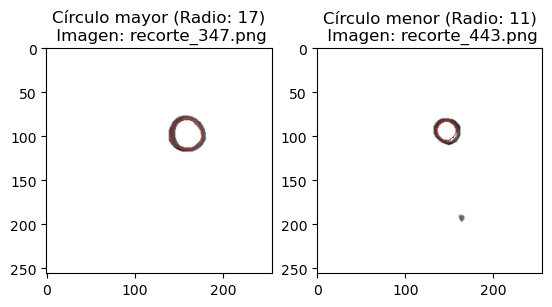

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar el círculo mayor y menor
radio_mayor = -1
radio_menor = float('inf')
imagen_mayor = None
imagen_menor = None
nombre_mayor = ""
nombre_menor = ""

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    
    # Cargar la imagen
    imagen = Image.open(ruta_imagen)
    
    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")

    # Obtener la matriz de píxeles de la imagen binaria
    pixels = imagen_binaria.load()
    
    # Contar los píxeles blancos dentro de la región
    contador = 0
    for y in range(imagen_binaria.size[1]):
        for x in range(imagen_binaria.size[0]):
            if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                contador += 1

    # Solo procesar imágenes con más de 80 píxeles blancos
    if contador <= 80:
        continue

    # Convertir la imagen binaria a una matriz NumPy
    imagen_array = np.array(imagen_binaria)
    
    # Configurar los parámetros de la transformada de Hough circular
    radio_min = 10  # Radio mínimo del círculo a buscar
    radio_max = 200  # Radio máximo del círculo a buscar
    
    # Aplicar la transformada de Hough circular
    hough_radii = np.arange(radio_min, radio_max + 1)
    hough_result = hough_circle(imagen_array, hough_radii)
    
    # Encontrar los parámetros de los círculos
    accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)
    
    # Comprobar si se encontraron círculos
    if len(cx) == 0:
        # No se encontraron círculos en la imagen, omitir esta imagen
        continue
    
    # Obtener los parámetros del círculo encontrado
    centro_x = cx[0]
    centro_y = cy[0]
    radio = radii[0]
    
    # Actualizar círculo mayor
    if radio > radio_mayor:
        radio_mayor = radio
        imagen_mayor = imagen.copy()
        dibujo_mayor = imagen_mayor.copy()
        draw_mayor = ImageDraw.Draw(dibujo_mayor)
        draw_mayor.ellipse((centro_x - radio_mayor, centro_y - radio_mayor, centro_x + radio_mayor, centro_y + radio_mayor), outline="red")
        nombre_mayor = archivo
    
    # Actualizar círculo menor
    if radio < radio_menor:
        radio_menor = radio
        imagen_menor = imagen.copy()
        dibujo_menor = imagen_menor.copy()
        draw_menor = ImageDraw.Draw(dibujo_menor)
        draw_menor.ellipse((centro_x - radio_menor, centro_y - radio_menor, centro_x + radio_menor, centro_y + radio_menor), outline="red")
        nombre_menor = archivo

# Verificar si se encontraron círculos en todas las imágenes
if imagen_mayor is None or imagen_menor is None:
    print("No se encontraron círculos en algunas imágenes.")
else:
    # Mostrar los círculos mayor y menor
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(dibujo_mayor)
    axes[0].set_title("Círculo mayor (Radio: {})\n Imagen: {}".format(radio_mayor, nombre_mayor))
    axes[0].axis('on')
    axes[1].imshow(dibujo_menor)
    axes[1].set_title("Círculo menor (Radio: {})\n Imagen: {}".format(radio_menor, nombre_menor))
    axes[1].axis('on')
    plt.show()

**<font size="4">Método híbrido con centrado de imagen**</font>

Círculo encontrado: Centro = (159, 99), Radio = 17
Círculo encontrado: Centro = (157, 94), Radio = 16
Círculo encontrado: Centro = (149, 95), Radio = 14
Círculo encontrado: Centro = (153, 98), Radio = 14
Círculo encontrado: Centro = (162, 100), Radio = 17
Círculo encontrado: Centro = (163, 101), Radio = 17
Círculo encontrado: Centro = (146, 94), Radio = 11


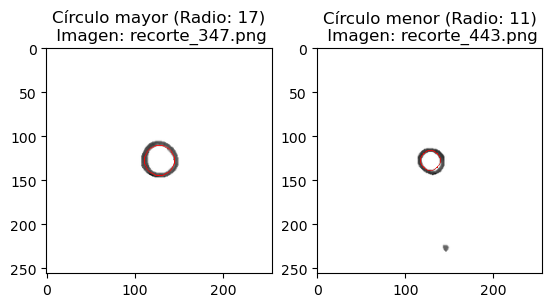

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar el círculo mayor y menor
radio_mayor = -1
radio_menor = float('inf')
imagen_mayor = None
imagen_menor = None
nombre_mayor = ""
nombre_menor = ""

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    
    # Cargar la imagen
    imagen = Image.open(ruta_imagen)

    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")
    
    # Obtener la matriz de píxeles de la imagen binaria
    pixels = imagen_binaria.load()

    # Contar los píxeles blancos dentro de la región
    contador = 0
    for y in range(imagen_binaria.size[1]):
        for x in range(imagen_binaria.size[0]):
            if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                contador += 1

    # Solo procesar imágenes con más de 80 píxeles blancos
    if contador <= 80:
        continue

    # Convertir la imagen binaria a una matriz NumPy
    imagen_array = np.array(imagen_binaria)
    
    # Configurar los parámetros de la transformada de Hough circular
    radio_min = 10  # Radio mínimo del círculo a buscar
    radio_max = 200  # Radio máximo del círculo a buscar
    
    # Aplicar la transformada de Hough circular
    hough_radii = np.arange(radio_min, radio_max + 1)
    hough_result = hough_circle(imagen_array, hough_radii)
    
    # Encontrar los parámetros de los círculos
    accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)
    
    # Comprobar si se encontraron círculos
    if len(cx) == 0:
        # No se encontraron círculos en la imagen, omitir esta imagen
        continue

    # Obtener los parámetros del círculo encontrado
    centro_x = cx[0]
    centro_y = cy[0]
    radio = radii[0]

    # Mostrar los parámetros del círculo encontrado
    print("Círculo encontrado: Centro = ({}, {}), Radio = {}".format(centro_x, centro_y, radio))

    # Centrar la imagen
    imagen_centro_x = imagen.size[0] // 2
    imagen_centro_y = imagen.size[1] // 2

    desplazamiento_x = centro_x - imagen_centro_x
    desplazamiento_y = centro_y - imagen_centro_y

    # Crear una nueva imagen con el mismo tamaño y modo que la imagen original
    imagen_desplazada = Image.new(imagen.mode, imagen.size, (0, 0, 0, 0))

    # Pegar la imagen original en la nueva imagen con el desplazamiento
    imagen_desplazada.paste(imagen, (-desplazamiento_x, -desplazamiento_y))

    # Convertir la imagen desplazada a modo binario (blanco y negro)
    imagen_binaria = imagen_desplazada.convert("1")

    # Actualizar círculo mayor
    if radio > radio_mayor:
        radio_mayor = radio
        imagen_mayor = imagen_desplazada.copy()
        dibujo_mayor = imagen_mayor.copy()
        draw_mayor = ImageDraw.Draw(dibujo_mayor)
        draw_mayor.ellipse((imagen_centro_x - radio_mayor, imagen_centro_y - radio_mayor, imagen_centro_x + radio_mayor, imagen_centro_y + radio_mayor), outline="red")
        nombre_mayor = archivo

    # Actualizar círculo menor
    if radio < radio_menor:
        radio_menor = radio
        imagen_menor = imagen_desplazada.copy()
        dibujo_menor = imagen_menor.copy()
        draw_menor = ImageDraw.Draw(dibujo_menor)
        draw_menor.ellipse((imagen_centro_x - radio_menor, imagen_centro_y - radio_menor, imagen_centro_x + radio_menor, imagen_centro_y + radio_menor), outline="red")
        nombre_menor = archivo

# Verificar si se encontraron círculos en todas las imágenes
if imagen_mayor is None or imagen_menor is None:
    print("No se encontraron círculos en algunas imágenes.")
else:
    # Dibujar el círculo mayor
    dibujo_mayor = imagen_mayor.copy()
    draw_mayor = ImageDraw.Draw(dibujo_mayor)
    draw_mayor.ellipse((imagen_centro_x - radio_mayor, imagen_centro_y - radio_mayor, imagen_centro_x + radio_mayor, imagen_centro_y + radio_mayor), outline="red")

    # Dibujar el círculo menor
    dibujo_menor = imagen_menor.copy()
    draw_menor = ImageDraw.Draw(dibujo_menor)
    draw_menor.ellipse((imagen_centro_x - radio_menor, imagen_centro_y - radio_menor, imagen_centro_x + radio_menor, imagen_centro_y + radio_menor), outline="red")

    # Mostrar los círculos mayor y menor
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(dibujo_mayor)
    axes[0].set_title("Círculo mayor (Radio: {})\n Imagen: {}".format(radio_mayor, nombre_mayor))
    axes[0].axis('on')

    axes[1].imshow(dibujo_menor)
    axes[1].set_title("Círculo menor (Radio: {})\n Imagen: {}".format(radio_menor, nombre_menor))
    axes[1].axis('on')

    plt.show()

**<font size="4">Método híbrido con centrado de imagen y eliminación de ruido**</font>

Círculo encontrado: Centro = (159, 99), Radio = 17
Círculo encontrado: Centro = (157, 94), Radio = 16
Círculo encontrado: Centro = (149, 95), Radio = 14
Círculo encontrado: Centro = (153, 98), Radio = 14
Círculo encontrado: Centro = (162, 100), Radio = 17
Círculo encontrado: Centro = (163, 101), Radio = 17
Círculo encontrado: Centro = (146, 94), Radio = 11


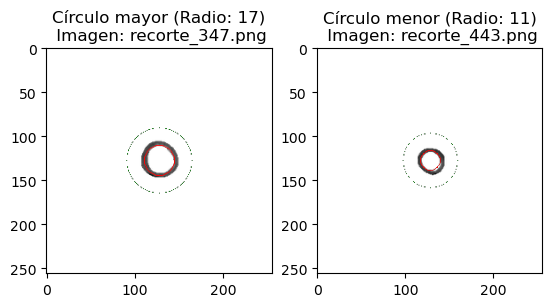

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar el círculo mayor y menor
radio_mayor = -1
radio_menor = float('inf')
imagen_mayor = None
imagen_menor = None
nombre_mayor = ""
nombre_menor = ""

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)

    # Cargar la imagen
    imagen = Image.open(ruta_imagen)

    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")

    # Obtener la matriz de píxeles de la imagen binaria
    pixels = imagen_binaria.load()

    # Contar los píxeles blancos dentro de la región
    contador = 0
    for y in range(imagen_binaria.size[1]):
        for x in range(imagen_binaria.size[0]):
            if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                contador += 1

    # Solo procesar imágenes con más de 80 píxeles blancos
    if contador <= 80:
        continue

    # Convertir la imagen binaria a una matriz NumPy
    imagen_array = np.array(imagen_binaria)

    # Configurar los parámetros de la transformada de Hough circular
    radio_min = 10  # Radio mínimo del círculo a buscar
    radio_max = 200  # Radio máximo del círculo a buscar

    # Aplicar la transformada de Hough circular
    hough_radii = np.arange(radio_min, radio_max + 1)
    hough_result = hough_circle(imagen_array, hough_radii)

    # Encontrar los parámetros de los círculos
    accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)

    # Comprobar si se encontraron círculos
    if len(cx) == 0:
        # No se encontraron círculos en la imagen, omitir esta imagen
        continue

    # Obtener los parámetros del círculo encontrado
    centro_x = cx[0]
    centro_y = cy[0]
    radio = radii[0]

    # Mostrar los parámetros del círculo encontrado
    print("Círculo encontrado: Centro = ({}, {}), Radio = {}".format(centro_x, centro_y, radio))

    # Centrar la imagen
    imagen_centro_x = imagen.size[0] // 2
    imagen_centro_y = imagen.size[1] // 2

    desplazamiento_x = centro_x - imagen_centro_x
    desplazamiento_y = centro_y - imagen_centro_y

    # Crear una nueva imagen con el mismo tamaño y modo que la imagen original
    imagen_desplazada = Image.new(imagen.mode, imagen.size, (0, 0, 0, 0))

    # Pegar la imagen original en la nueva imagen con el desplazamiento
    imagen_desplazada.paste(imagen, (-desplazamiento_x, -desplazamiento_y))

    # Convertir la imagen desplazada a modo binario (blanco y negro)
    imagen_binaria = imagen_desplazada.convert("1")

    # Añadir el radio ampliado y eliminar todo fuera de este radio para cada círculo
    radio_ampliado = radio + 20
    dibujo_ampliado = imagen_desplazada.copy()
    draw_ampliado = ImageDraw.Draw(dibujo_ampliado)

    # Dibujar el círculo ampliado
    draw_ampliado.ellipse((imagen_centro_x - radio_ampliado, imagen_centro_y - radio_ampliado, imagen_centro_x + radio_ampliado, imagen_centro_y + radio_ampliado), outline="green")

    # Eliminar todo fuera del círculo ampliado
    for y in range(dibujo_ampliado.size[1]):
        for x in range(dibujo_ampliado.size[0]):
            # Calcular la distancia al centro del círculo
            distancia = ((x - imagen_centro_x) ** 2 + (y - imagen_centro_y) ** 2) ** 0.5
            if distancia > radio_ampliado:
                # Si el píxel está fuera del círculo ampliado, hacerlo negro
                dibujo_ampliado.putpixel((x, y), 0)

    # Actualizar círculo mayor
    if radio > radio_mayor:
        radio_mayor = radio
        imagen_mayor = dibujo_ampliado.copy()
        nombre_mayor = archivo

    # Actualizar círculo menor
    if radio < radio_menor:
        radio_menor = radio
        imagen_menor = dibujo_ampliado.copy()
        nombre_menor = archivo

# Verificar si se encontraron círculos en todas las imágenes
if imagen_mayor is None or imagen_menor is None:
    print("No se encontraron círculos en algunas imágenes.")
else:
    # Dibujar el círculo mayor
    dibujo_mayor = imagen_mayor.copy()
    draw_mayor = ImageDraw.Draw(dibujo_mayor)
    draw_mayor.ellipse((imagen_centro_x - radio_mayor, imagen_centro_y - radio_mayor, imagen_centro_x + radio_mayor, imagen_centro_y + radio_mayor), outline="red")

    # Dibujar el círculo menor
    dibujo_menor = imagen_menor.copy()
    draw_menor = ImageDraw.Draw(dibujo_menor)
    draw_menor.ellipse((imagen_centro_x - radio_menor, imagen_centro_y - radio_menor, imagen_centro_x + radio_menor, imagen_centro_y + radio_menor), outline="red")

    # Mostrar los círculos mayor y menor
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(dibujo_mayor)
    axes[0].set_title("Círculo mayor (Radio: {})\n Imagen: {}".format(radio_mayor, nombre_mayor))
    axes[0].axis('on')

    axes[1].imshow(dibujo_menor)
    axes[1].set_title("Círculo menor (Radio: {})\n Imagen: {}".format(radio_menor, nombre_menor))
    axes[1].axis('on')

    plt.show()

**<font size="4">Implementación: Método híbrido con centrado de imagen y eliminación de ruido**</font>

<dl>
<dt>Modificaciones:</dt>
    <dd>- Cambiar output a una imagen compuesta por las dos selecciones. Sin título, ejes ni círculos de referencia.</dd>
    <dd>- Crear función general para cualquier carpeta</dd>
    <dd>- Crear script para ejecutar la función en todo del dataset</dd>
</dl>

In [123]:
# Ruta de la carpeta que contiene las imágenes
ruta_carpeta = "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_8/only_cine_eje_corto_8frame_1/recortes/"

In [124]:
import os
import numpy as np
from PIL import Image, ImageDraw
from skimage.transform import hough_circle, hough_circle_peaks

# Listar los archivos en la carpeta
archivos = os.listdir(ruta_carpeta)

# Variables para almacenar el círculo mayor y menor
radio_mayor = -1
radio_menor = float('inf')
imagen_mayor = None
imagen_menor = None

for archivo in archivos:
    # Ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, archivo)

    # Cargar la imagen
    imagen = Image.open(ruta_imagen)

    # Convertir la imagen a modo binario (blanco y negro)
    imagen_binaria = imagen.convert("1")

    # Obtener la matriz de píxeles de la imagen binaria
    pixels = imagen_binaria.load()

    # Contar los píxeles blancos dentro de la región
    contador = 0
    for y in range(imagen_binaria.size[1]):
        for x in range(imagen_binaria.size[0]):
            if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                contador += 1

    # Solo procesar imágenes con más de 80 píxeles blancos
    if contador <= 80:
        continue

    # Convertir la imagen binaria a una matriz NumPy
    imagen_array = np.array(imagen_binaria)

    # Configurar los parámetros de la transformada de Hough circular
    radio_min = 10  # Radio mínimo del círculo a buscar
    radio_max = 200  # Radio máximo del círculo a buscar

    # Aplicar la transformada de Hough circular
    hough_radii = np.arange(radio_min, radio_max + 1)
    hough_result = hough_circle(imagen_array, hough_radii)

    # Encontrar los parámetros de los círculos
    accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)

    # Comprobar si se encontraron círculos
    if len(cx) == 0:
        # No se encontraron círculos en la imagen, omitir esta imagen
        continue

    # Obtener los parámetros del círculo encontrado
    centro_x = cx[0]
    centro_y = cy[0]
    radio = radii[0]

    # Centrar la imagen
    imagen_centro_x = imagen.size[0] // 2
    imagen_centro_y = imagen.size[1] // 2

    desplazamiento_x = centro_x - imagen_centro_x
    desplazamiento_y = centro_y - imagen_centro_y

    # Crear una nueva imagen con el mismo tamaño y modo que la imagen original
    imagen_desplazada = Image.new(imagen.mode, imagen.size, (0, 0, 0, 0))

    # Pegar la imagen original en la nueva imagen con el desplazamiento
    imagen_desplazada.paste(imagen, (-desplazamiento_x, -desplazamiento_y))

    # Añadir el radio ampliado y eliminar todo fuera de este radio para cada círculo
    radio_ampliado = radio + 20
    dibujo_ampliado = imagen_desplazada.copy()
    draw_ampliado = ImageDraw.Draw(dibujo_ampliado)

    # Eliminar todo fuera del círculo ampliado
    for y in range(dibujo_ampliado.size[1]):
        for x in range(dibujo_ampliado.size[0]):
            # Calcular la distancia al centro del círculo
            distancia = ((x - imagen_centro_x) ** 2 + (y - imagen_centro_y) ** 2) ** 0.5
            if distancia > radio_ampliado:
                # Si el píxel está fuera del círculo ampliado, hacerlo negro
                dibujo_ampliado.putpixel((x, y), 0)

    # Actualizar círculo mayor
    if radio > radio_mayor:
        radio_mayor = radio
        imagen_mayor = dibujo_ampliado.copy()

    # Actualizar círculo menor
    if radio < radio_menor:
        radio_menor = radio
        imagen_menor = dibujo_ampliado.copy()

if imagen_mayor is None or imagen_menor is None:
    print("No se encontraron círculos en algunas imágenes.")
else:
    # Recortar la imagen_mayor para que coincida con la imagen_menor
    ancho, alto = imagen_menor.size
    left = (imagen_mayor.width - ancho) / 2
    top = (imagen_mayor.height - alto) / 2
    right = (imagen_mayor.width + ancho) / 2
    bottom = (imagen_mayor.height + alto) / 2

    # Asegurarse de que los límites sean enteros
    left, top, right, bottom = round(left), round(top), round(right), round(bottom)

    imagen_mayor = imagen_mayor.crop((left, top, right, bottom))

    # Convertir las imágenes a matrices numpy
    imagen_mayor_np = np.array(imagen_mayor)
    imagen_menor_np = np.array(imagen_menor)

    # Concatenar las imágenes
    imagen_combinada_np = np.concatenate((imagen_mayor_np, imagen_menor_np), axis=1)

    # Convertir la matriz numpy de vuelta a una imagen
    imagen_combinada = Image.fromarray(imagen_combinada_np)

    # Guardar la imagen combinada
    imagen_combinada.save(os.path.join(ruta_carpeta, "MAX_MIN.png"))

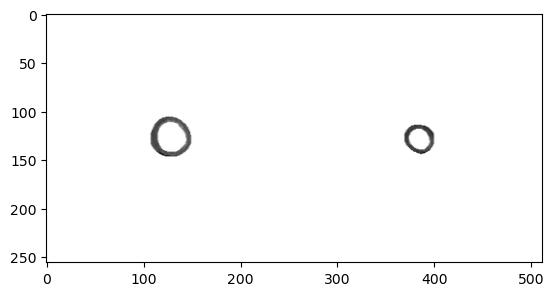

In [126]:
import matplotlib.pyplot as plt
from PIL import Image

ruta_imagen = '/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_8/only_cine_eje_corto_8frame_1/recortes/MAX_MIN.png' 

# Cargar la imagen
imagen = Image.open(ruta_imagen)

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('on')  # Mostrar los ejes
plt.show()

In [127]:
# Creamos la función
def process_recortes_dir(ruta_carpeta):
    # Listar los archivos en la carpeta
    archivos = os.listdir(ruta_carpeta)

    # Variables para almacenar el círculo mayor y menor
    radio_mayor = -1
    radio_menor = float('inf')
    imagen_mayor = None
    imagen_menor = None

    for archivo in archivos:
        # Ruta completa del archivo
        ruta_imagen = os.path.join(ruta_carpeta, archivo)

        # Cargar la imagen
        imagen = Image.open(ruta_imagen)

        # Convertir la imagen a modo binario (blanco y negro)
        imagen_binaria = imagen.convert("1")

        # Obtener la matriz de píxeles de la imagen binaria
        pixels = imagen_binaria.load()

        # Contar los píxeles blancos dentro de la región
        contador = 0
        for y in range(imagen_binaria.size[1]):
            for x in range(imagen_binaria.size[0]):
                if pixels[x, y] == 255:  # Valor del píxel blanco en modo binario
                    contador += 1

        # Solo procesar imágenes con más de 80 píxeles blancos
        if contador <= 80:
            continue

        # Convertir la imagen binaria a una matriz NumPy
        imagen_array = np.array(imagen_binaria)

        # Configurar los parámetros de la transformada de Hough circular
        radio_min = 10  # Radio mínimo del círculo a buscar
        radio_max = 200  # Radio máximo del círculo a buscar

        # Aplicar la transformada de Hough circular
        hough_radii = np.arange(radio_min, radio_max + 1)
        hough_result = hough_circle(imagen_array, hough_radii)

        # Encontrar los parámetros de los círculos
        accums, cx, cy, radii = hough_circle_peaks(hough_result, hough_radii, total_num_peaks=1)

        # Comprobar si se encontraron círculos
        if len(cx) == 0:
            # No se encontraron círculos en la imagen, omitir esta imagen
            continue

        # Obtener los parámetros del círculo encontrado
        centro_x = cx[0]
        centro_y = cy[0]
        radio = radii[0]

        # Centrar la imagen
        imagen_centro_x = imagen.size[0] // 2
        imagen_centro_y = imagen.size[1] // 2

        desplazamiento_x = centro_x - imagen_centro_x
        desplazamiento_y = centro_y - imagen_centro_y

        # Crear una nueva imagen con el mismo tamaño y modo que la imagen original
        imagen_desplazada = Image.new(imagen.mode, imagen.size, (0, 0, 0, 0))

        # Pegar la imagen original en la nueva imagen con el desplazamiento
        imagen_desplazada.paste(imagen, (-desplazamiento_x, -desplazamiento_y))

        # Añadir el radio ampliado y eliminar todo fuera de este radio para cada círculo
        radio_ampliado = radio + 20
        dibujo_ampliado = imagen_desplazada.copy()
        draw_ampliado = ImageDraw.Draw(dibujo_ampliado)

        # Eliminar todo fuera del círculo ampliado
        for y in range(dibujo_ampliado.size[1]):
            for x in range(dibujo_ampliado.size[0]):
                # Calcular la distancia al centro del círculo
                distancia = ((x - imagen_centro_x) ** 2 + (y - imagen_centro_y) ** 2) ** 0.5
                if distancia > radio_ampliado:
                    # Si el píxel está fuera del círculo ampliado, hacerlo negro
                    dibujo_ampliado.putpixel((x, y), 0)

        # Actualizar círculo mayor
        if radio > radio_mayor:
            radio_mayor = radio
            imagen_mayor = dibujo_ampliado.copy()

        # Actualizar círculo menor
        if radio < radio_menor:
            radio_menor = radio
            imagen_menor = dibujo_ampliado.copy()

    if imagen_mayor is None or imagen_menor is None:
        print("No se encontraron círculos en algunas imágenes.")
    else:
        # Recortar la imagen_mayor para que coincida con la imagen_menor
        ancho, alto = imagen_menor.size
        left = (imagen_mayor.width - ancho) // 2
        top = (imagen_mayor.height - alto) // 2
        right = left + ancho
        bottom = top + alto

        # Asegurarse de que los límites sean enteros
        left, top, right, bottom = int(left), int(top), int(right), int(bottom)

        imagen_mayor = imagen_mayor.crop((left, top, right, bottom))

        # Convertir las imágenes a matrices numpy
        imagen_mayor_np = np.array(imagen_mayor)
        imagen_menor_np = np.array(imagen_menor)

        # Concatenar las imágenes
        imagen_combinada_np = np.concatenate((imagen_mayor_np, imagen_menor_np), axis=1)

        # Convertir la matriz numpy de vuelta a una imagen
        imagen_combinada = Image.fromarray(imagen_combinada_np)

        # Guardar la imagen combinada
        imagen_combinada.save(os.path.join(ruta_carpeta, "MAX_MIN.png"))
        ruta_completa = os.path.join(ruta_carpeta)
        print("Directorio:", ruta_completa)
        

In [120]:
#llamamos a la función para ver que funciona correctamente
ruta_carpeta = "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_8/only_cine_eje_corto_8frame_1/recortes/"
process_recortes_dir(ruta_carpeta)

Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_7/only_cine_eje_corto_7frame_3/recortes


In [130]:
import os

def process_dataset():
    # Rutas de los directorios a procesar
    directorios = [
        "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH",
        "/home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/Otros"
    ]

    for directorio in directorios:
        for root, dirs, files in os.walk(directorio):
            for dir_name in dirs:
                if dir_name == 'recortes':
                    recortes_dir = os.path.join(root, dir_name)
                    process_recortes_dir(recortes_dir)

# Llamada a la función para procesar las carpetas "recortes" de los directorios específicos
process_dataset()

Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_2/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_24/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_10/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_20/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_15/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_6/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_18/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130frame_11/recortes
Directorio: /home/win001/00_heart/00_Dataset_CNN/02_ALL_FRAMES/MCH/_130/only_cine_eje_corto_130fra